# Experiments with Spectrogram Dreamer

This notebook has the objective of analyzing the model training and inference in order to understand best it's functioning.

In [1]:
# setup
%pip install torch==2.2.2
%pip install torchaudio==2.2.2
%pip install pandas
%pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 42.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 41.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 10.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━

In [3]:
# torch imports
import torch

# viz
import pandas as pd
import matplotlib.pyplot as plt

## Analyzing Loss

In [1]:
%pwd

'/Users/rcss/Documents/master/spectrogram-dreamer/notebooks'

In [21]:
# Analyzing the loss
column_names = ['id', 'loss', 'epoch']
wm_train_df = pd.read_csv("/Users/rcss/Documents/master/spectrogram-dreamer/mlruns/441047914029973179/006a75d95d1046658c00a52d9ccb2ef3/metrics/train_epoch/world_loss", sep=" ", header=None, names=column_names)
wm_train_df.head()

,id,loss,epoch
0,1763881761949,8.255484,0
1,1763882226824,4.134908,1
2,1763882691946,2.999930,2
3,1763883156659,2.416209,3
4,1763883622175,2.067233,4


In [22]:
# Analyzing the loss
column_names = ['id', 'loss', 'epoch']
wm_val_df = pd.read_csv("/Users/rcss/Documents/master/spectrogram-dreamer/mlruns/441047914029973179/006a75d95d1046658c00a52d9ccb2ef3/metrics/val_epoch/world_loss", sep=" ", header=None, names=column_names)
wm_val_df.head()

,id,loss,epoch
0,1763881761950,5.043592,0
1,1763882226824,3.449831,1
2,1763882691947,2.715466,2
3,1763883156660,2.388679,3
4,1763883622176,2.002018,4


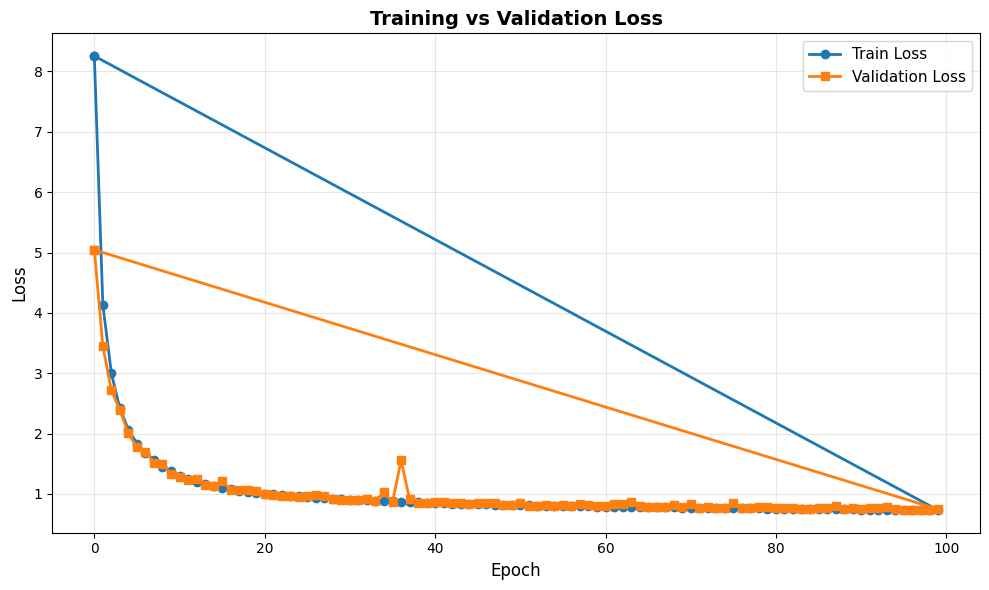

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(wm_train_df["epoch"], wm_train_df["loss"], label="Train Loss", marker='o', linewidth=2)
plt.plot(wm_val_df["epoch"], wm_val_df["loss"], label="Validation Loss", marker='s', linewidth=2)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Training vs Validation Loss", fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()